#### ICS 104 - Introduction to Programming in Python and C
# Pointers and Modular Programming
## Reading Assignment

- Chapter 6: Sections 1,2, 3 and 4.

# Learning Outcomes  
At the end of this chapter, you will be able to
- use pointers and indirect addressing in writing small C programs.
- read data from files and write data into files.
- return function results through a function’s arguments.
- recognize the differences between call-by-value and call-by-reference.
- distinguish between input, in-out, and output parameters.
- determine the scope of names in a C program.

# Pointers
- How do we interpret the following declaration:
```C  
   double *p;
```

- `p` is considered as a **pointer variable** of type "pointer to double".
    - In current object-oriented languages notation, we say that `p` is a **reference** to a variable of type double.
- `p` stores the address in memory of a variable of type double.

- Do you remember the following image?
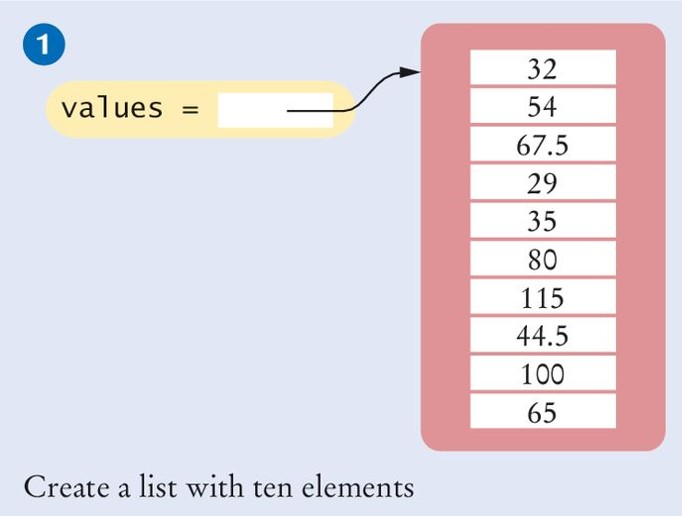
- The value of `values` is a reference (or an address) (or a pointer) to a list. 

- Consider the following C code fragment:
```C
int m = 25;
int *itemp;   /* pointer to integer */
itemp = &m;   /* Store address of m 
                   in pointer itemp*/
```

- Assume that variable `m` is associated with memory cell 1024.

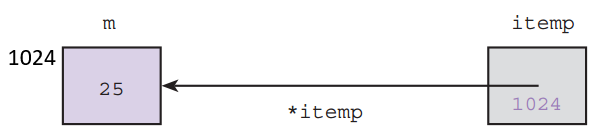

# Indirect Reference
- When we try to access the contents (value) of a memory cell through a pointer variable that stores its address, then we are using an <font color='blue'>indirect reference</font> to a variable.
```C
*itemp = 35; /* changes the value of variable m (indirect reference) */
m = 40;      /* changes the value of variable m (direct reference) */
```

## Pointer Declaration
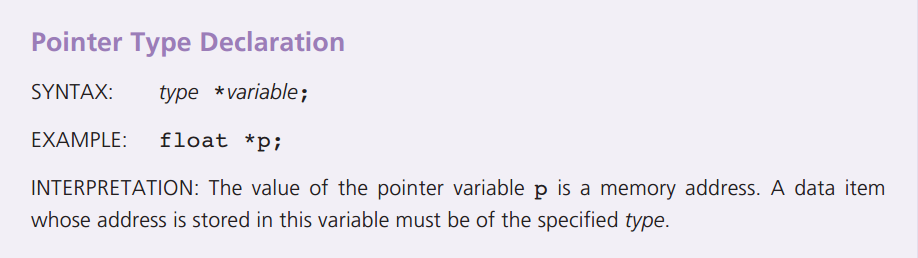

## Student Activity

- Trace the execution of the following C program
```C
#include <stdio.h>
int main(void) {
    int m = 10, n = 5;
    int *mp, *np;

    mp = &m;
    np = &n;

    *mp = *mp + *np;
    *np = *mp - *np;

    printf("%d %d\n%d %d\n", m, *mp, n, *np);
    return (0);
}
```

# Functions with Output Parameters
- Function arguments (arguments list) enable a function to manipulate different data each time it is called. 
- So far, we know how to pass inputs to a function and how to use the return statement to send back one result value from a function. 
- Using indirect references, we can use the argument to return results (in addition to the one returned by the function). 

- When a function call executes, the computer allocates memory space **in the function data area** for each formal parameter. 
- The value of each actual parameter (in the function call) is stored in the memory cell allocated to its corresponding formal parameter (in the function data area).
    - This type of function calls is called **call by value**.
- The question is: If the function formal parameters are, say, of type `int`, and if we change its value inside the function body, does that affect the actual parameter in the function call?

-  
    - The answer is no. Why?
    - 
- Now, let us ask this question: If the function formal parameters are, say, of type `int *`, that is a pointer/reference to an integer and if we change its value inside the function body, does that affect the actual parameter in the function call?
    - The answer is 
    - This type of function calls is called **call by reference**.

## Call by Value vs. Call by Reference
- Assume that function `swap` swaps the **integer values** in the body, and that the function `pswap` swaps the integer values **pointed to** by its arguments.
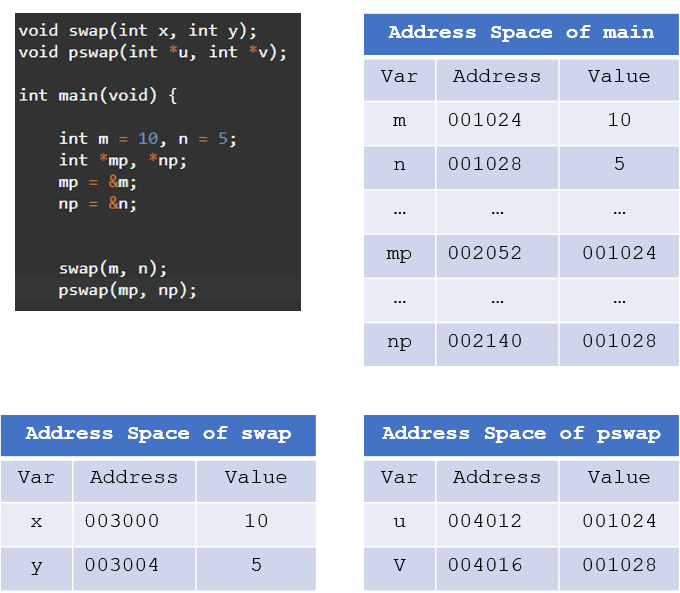

# Pointers to Files
- C allows a program to explicitly name a file for input or output.
- File pointers can be declared by:
```C
FILE *inp;
FILE *outp;
```
- Just like Python, you need to first open the files for reading or writing:
```C
inp  = fopen("infile.txt","r");
outp = fopen("outfile.txt","w");
```

- `fscanf`
    - The file equivalent of `scanf`. For example,
```C
fscanf(inp, "%1f", &item);
```
    - Like `scanf`, it returns the number of successfully read values (or a negative number if the end of file is reached)
- `fprintf`
    - The file equivalent of `printf`. For example,
```C
fprintf(outp, "%.2f\n", item);
```
- Closing a file when done:
```C
fclose(inp);
fclose(outp);
```

## Example of a program that reads and writes from files.
- Note that you need to run C on your machine in order to read from files and write into files.

In [3]:
%%writefile indata.txt
344 55 6.3556 9.4
 43.123 47.596

Writing indata.txt


In [ ]:
#include <stdio.h>

int
main(void)
{
      FILE *inp;         /* pointer to input file */
      FILE *outp;        /* pointer to ouput file */
      double item;
      int input_status;  /* status value returned by fscanf */

      /* Prepare files for input or output */
      inp = fopen("indata.txt", "r");
      outp = fopen("outdata.txt", "w");

      /* Input each item, format it, and write it */
      input_status = fscanf(inp, "%lf", &item);
      while (input_status == 1) {
          fprintf(outp, "%.2f\n", item);
          input_status = fscanf(inp, "%lf", &item);
      }

      /* Close the files */
      fclose(inp);
      fclose(outp);

      return (0);
}  


## Example Function with Input and Output Parameters
- Consider the following function:
```C
/*
 * Separates a number into three parts: a sign (+, -, or blank),
 * a whole number magnitude, and a fractional part.
 */

  void
  separate(double num, /* input - value to be split */
           char *signp, /* output - sign of num */
           int *wholep, /* output - whole number magnitude of num */
           double *fracp) /* output - fractional part of num */
{
   double magnitude; /* local variable - magnitude of num */
   
   /* Determines sign of num */
   if (num < 0)
      *signp = '-';
   else if (num == 0)
      *signp = ' ';
   else
      *signp = '+';

   /* Finds magnitude of num (its absolute value) and
   separates it into whole and fractional parts */
   magnitude = fabs(num);
   *wholep = floor(magnitude);
   *fracp = magnitude - *wholep;
 }
```

In [ ]:
#include <stdio.h>  
#include <math.h>  
void separate(double num, char *signp, int *wholep, double *fracp);
  
int
main(void)
{
      double value; /* input - number to analyze                           */
      char sn;      /* output - sign of value                              */
      int whl;      /* output - whole number magnitude of value            */
      double fr;    /* output - fractional part of value                   */

      /* Gets data                                                         */
      printf("Enter a value to analyze> ");
      scanf("%lf", &value);

      /* Separates data value into three parts                             */
      separate(value, &sn, &whl, &fr);

      /* Prints results                                                    */
      printf("Parts of %.4f\n sign: %c\n", value, sn);
      printf(" whole number magnitude: %d\n", whl);
      printf(" fractional part: %.4f\n", fr);

      return (0);
}

/*
 * Separates a number into three parts: a sign (+, -, or blank),
 * a whole number magnitude, and a fractional part.
 * Pre: num is defined; signp, wholep, and fracp contain addresses of memory
 *      cells where results are to be stored
 * Post: function results are stored in cells pointed to by signp, wholep, and
 *       fracp
 */
void
separate(double num,     /* input - value to be split                      */
         char   *signp,  /* output - sign of num                           */
         int    *wholep, /* output - whole number magnitude of num         */
         double *fracp)  /* output - fractional part of num                */
{
      double magnitude; /* local variable - magnitude of num               */
      /* Determines sign of num */
      if (num < 0)
            *signp = '-';
      else if (num == 0)
            *signp = ' ';
      else
            *signp = '+';

      /* Finds magnitude of num (its absolute value) and separates it into
         whole and fractional parts                                          */
      magnitude = fabs(num);
      *wholep = floor(magnitude);
      *fracp = magnitude - *wholep;
}

## Meanings of * Symbol
- We have studied 3 meanings of the * symbol:
    1. Binary Multiplication Operator.
    2. Defining the data type "pointer to" in declaring variables
        - e.g. `char *signp`
    3. Accessing a variable, indirectly, through its address
        - e.g. ` *signp = '-'`

## Student Activity
- Write a prototype for a function `sum_n_avg` that has three type `double` input parameters and two output parameters. The function computes the sum and the average of its three input arguments and relays its results through two output parameters

![activity2.PNG](attachment:activity2.PNG)

- The following code fragment is from a function preparing to call `sum_n_avg`. Complete the function call statement.  
```C  
{
 double one, two, three, sum_of_3, avg_of_3;
 printf("Enter three numbers> ");
 scanf("%lf%lf%lf", &one, &two, &three);
 sum_n_avg(???);
}  
```

# Multiple Calls to a Function with Input/Output Parameters
- We can define a function, in which some input arguments can also act as output results.
- Consider developing a function `order` that orders the `double` values in its arguments, such that the first argument will always hold the smaller number and the second argument will always hold the larger number.
- First of all, what shall the type of the arguments of function `order` be?

- The type of arguments shall be a pointer to double.
```C
/*
 * Arranges arguments in ascending order.
 * Pre:  smp and lgp are addresses of defined type double variables
 * Post: variable pointed to by smp contains the smaller of the type
 *       double values; variable pointed to by lgp contains the larger
 */
void
order(double *smp, double *lgp)    /* input/output */
{
        double temp; /* temporary variable to hold one number during swap      */
        /* Compares values pointed to by smp and lgp and switches if necessary */
         if (*smp > *lgp) {
                 temp = *smp;
                 *smp = *lgp;
                 *lgp = temp;
        }
}
```

- Now, consider the problem of sorting three input numbers, `num1`, `num2` and `num3` from lowest to highest.
    - That is, we would like `num1` to hold the smallest value, `num2` to hold the second smallest value, and `num3` to hold the largest value. How can achieve that using the `order` function? 

- 
```
  order(num1, num2) -> num1 <= num2
  order(num1, num3) -> num1 <= num3
  order(num2, num3) -> num2 <= num3
```

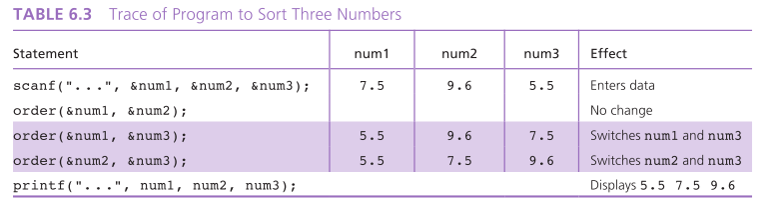

In [ ]:
#include <stdio.h>

void order(double *smp, double *lgp);

int
main(void)
{
        double num1, num2, num3; /* three numbers to put in order       */

        /* Gets test data                                               */
        printf("Enter three numbers separated by blanks> ");
        scanf("%lf%lf%lf", &num1, &num2, &num3);

        /* Orders the three numbers                                     */
        order(&num1, &num2);
        order(&num1, &num3);
        order(&num2, &num3);

        /* Displays results                                             */
        printf("The numbers in ascending order are: %.2f %.2f %.2f\n",
               num1, num2, num3);

        return (0);
}

/*
 * Arranges arguments in ascending order.
 * Pre:  smp and lgp are addresses of defined type double variables
 * Post: variable pointed to by smp contains the smaller of the type
 *       double values; variable pointed to by lgp contains the larger
 */
void
order(double *smp, double *lgp)    /* input/output */
{
        double temp; /* temporary variable to hold one number during swap      */
        /* Compares values pointed to by smp and lgp and switches if necessary */
         if (*smp > *lgp) {
                 temp = *smp;
                 *smp = *lgp;
                 *lgp = temp;
        }
}

# Summary of Different Types of Functions in C
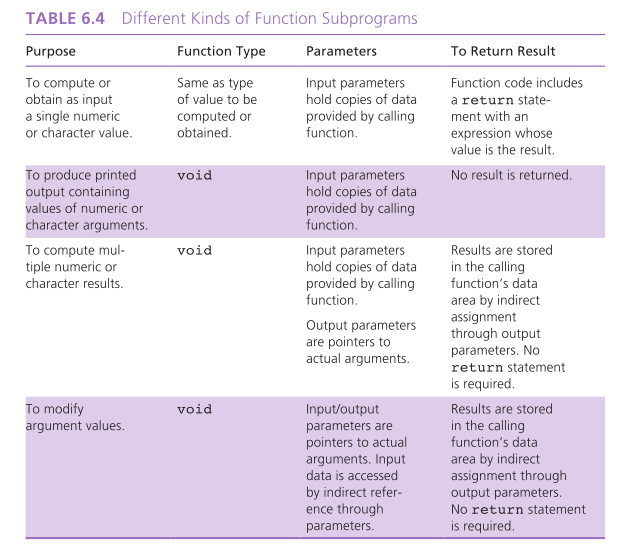

# Scope of Names
- The **scope of a name** refers to the region of a program where a particular meaning of a name is visible or can be referenced. 
- The scope of:
    - constant macros begins at their definition and continues to the end of the source file. 
    - a function subprogram begins with its prototype and continues to the end of the source file.
    - formal parameters and local variables extends from their declaration to the closing brace of the function in which they were declared.
- A local variable or a formal parameter may block the definition of a function (e.g.) if it has the same name.

## Example
- Consider the following C Code:

In [ ]:
#define MAX 950
#define LIMIT 200

void one(int anarg, double second); /* prototype 1 */

int fun_two(int one, char anarg);   /* prototype 2 */

int
main(void)
{
         int localvar;
        . . .
} /* end main */


void
one(int anarg, double second)       /* header 1     */
{
        int onelocal;               /* local 1      */
        . . .
} /* end one */


int
fun_two(int one, char anarg)        /* header 2     */
{
        int localvar;               /* local 2      */
        . . .
} /* end fun_two */

|Name|Visible in main|Visible in one|Visible in fun_two|
|:--:|:-------------:|:------------:|:----------------:|
|MAX      | yes | yes | yes |
|LIMIT    |   |   |   |
|main     |   |   |   |
|localvar (in **main**) |   |   |   |
|one (the function)     |   |  |   |
|anarg (**int**)        |    |  |   |
|second   |    |  |   |
|onelocal |    |  |   |
|fun_two  |   |  |  |
|one (**formal parameter**) |   |   |  |
|anarg (**char**)           |   |   |  |
|localvar (in fun_two)      |   |   |  |


|Name|Visible in main|Visible in one|Visible in fun_two|
|:--:|:-------------:|:------------:|:----------------:|
|MAX      | yes | yes | yes |
|LIMIT    | yes | yes | yes |
|main     | yes | yes | yes |
|localvar (in **main**) | yes | no | no |
|one (the function)     | yes | yes| no |
|anarg (**int**)        | no  | yes| no |
|second   | no  | yes| no |
|onelocal |  no | yes| no |
|fun_two  | yes | yes| yes|
|one (**formal parameter**) | no | no | yes|
|anarg (**char**)           | no | no | yes|
|localvar (in fun_two)      | no | no | yes|
